In [1]:
# DATA CHECK 
checkData <- function(data){
    ##필요한 설정들 
    options(warn = -1) ## 경고 지우기
    options(repr.plot.width=8, repr.plot.height=6) # 플랏 크기 조절
    Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8") # 한글 설정
    library(stringr) # stringr 불러오기
    library(dplyr) # dplyr 불러오기
    par(family ="AppleGothic",bg='grey') # 그래프 배경및 한글설정
    
    cat("*****************(1.DATA HEAD)*****************\n\n");
        print(head(data,2))
    cat("******************************************************************\n\n");
    cat("*****************(2.DATA TAIL)*****************\n\n");
        print(tail(data,2))
    cat("******************************************************************\n\n");
    cat("*****************(3.DATA Structure)*****************\n\n");
        str(data)
    cat("******************************************************************\n\n");
    # test 의 기본 통계량 보기
    cat("*****************(4.DATA Summary)*****************\n\n");
        print(summary(test))
    cat("******************************************************************\n\n");
    cat("*****************(5.NA check)*****************\n\n");
        cat(" 5.1 Data 전체에서의 NA 개수:", sum(is.na(data)),"\n\n")
        # 컬럼 별 na 확인
        cat(" 5.2 Column 별 NA check \n")
        for(i in 1:ncol(data)){
            cat("  col[",colnames(data[i]), "] --> NA 개수:",(sum(is.na(data[,i]))),"\n")
        }
        ## 컬럼별 na 합계 계산. 
        cat("column 별 na 합계 \n",colSums(is.na(data)) ,"\n")
    cat("******************************************************************\n\n");
    cat("*****************(6.Colum 별 data 빈도수 형평성 검사)*****************\n\n");
    #A 컬럼의 최대값 최소값 빈도수
    for(i in 1:ncol(test)){
        #cat("-----",colnames(test)[i] ," 컬럼의 빈도 분석결과----- \n")
        cat("최빈값:",max(table(test[,i])), "최소빈도값 :", min(table(test[,i])), "\n")
        barplot(table(test[,i]),

            main = paste(colnames(test)[i] ," 컬럼의 데이터 별 빈도 분석 \n"),
            ylab = "빈도수",
            xlab = "데이터값",
        )
        
        cat("\n")
        # 각 컬럼의 빈도수의 최대값, 최소값 구하기 
        cat(colnames(test)[i],"컬럼의 빈도수의 최대값과 최소값\n")

    }
    
 
}
## 결측치 보상 함수 
replaceNa <-function(data){
    #data 는 vector 

    # 결측치를 무조건 제거하면 통계량을 얻을수 없으며, 데이터 손실로 문제 발생
    # 1)결측치를 제거하고 평균구하기
    meanDeleteNa <-mean(data,na.rm = T)
    cat( " >> 결측치를 제거후 평균 : ", meanDeleteNa)

    # 2) NA를 0 으로 대체하여 평균구해보기 
    meanRepZero <-mean(ifelse(is.na(data),0,data))
    cat( "\n >> 결측치를 0으로 대체후 평균 : ", meanRepZero)

    # 3) NA 를 중앙값으로 대체하여 평균구해보기
    meanRepMedian <- mean(ifelse(is.na(data),median(data,na.rm = T),data))
    cat("\n >> 결측치를 중앙값(", median(data,na.rm = T),")으로 대체후 평균: ", meanRepMedian,sep="" )

    # 4) NA 를 최소값으로 대체하여 평균 구해보기
    meanRepMin <- mean(ifelse(is.na(data), min(data,na.rm = T),data))
    cat("\n >> 결측치를 최소값(",min(data,na.rm = T), ")으로 대체후 평균 : ",meanRepMin,sep="" )

    meanRepMax <- mean(ifelse(is.na(data), max(data,na.rm = T),data))
    cat("\n >> 결측치를 최대값(",max(data,na.rm = T), ")으로 대체후 평균 : ",meanRepMax,sep="" )
    
    meanRep1Qt <-mean(ifelse(is.na(data), quantile(data,0.25,na.rm = T),data))
    cat("\n >> 결측치를 1사분위(",quantile(data,0.25,na.rm = T), ")으로 대체후 평균 : ",meanRep1Qt,sep="" )

    meanRep2Qt <-mean(ifelse(is.na(data), quantile(data,0.5,na.rm = T),data))
    cat("\n >> 결측치를 2사분위(",quantile(data,0.5,na.rm = T), ")으로 대체후 평균 : ",meanRep2Qt,sep="" )

    meanRep3Qt <-mean(ifelse(is.na(data), quantile(data,0.75,na.rm = T),data))
    cat("\n >> 결측치를 3사분위(",quantile(data,0.75,na.rm = T), ")으로 대체후 평균 : ",meanRep3Qt,sep="" )

    meanRep4Qt <-mean(ifelse(is.na(data), quantile(data,1,na.rm = T),data))
    cat("\n >> 결측치를 4사분위(",quantile(data,1,na.rm = T), ")으로 대체후 평균 : ",meanRep4Qt,sep="" )
    
    ## 최적 결측치 대체 값 계산
    meanReps<-c(meanRep1Qt,meanRep2Qt,meanRep3Qt,meanRep4Qt,meanRepMax,meanRepMin,meanRepMedian,meanRepZero)
    names(meanReps)<-c("1사분위","2사분위","3사분위","4사분위","최대값","최소값","중앙값","0")
    minimum_meanReps<-min(abs(meanReps-mean(data,na.rm = T)))
    meanRepOptimum <-sum(ifelse(abs(meanReps-mean(data,na.rm = T)) == minimum_meanReps,meanReps,0))
    cat ("\n")
    meanRepOptName<-names(meanReps)[which(meanReps== meanRepOptimum)]
    cat("\n >> 최적 대체 => ",meanRepOptName ,"(",meanRepOptimum ,")")


}

## Legend 세팅 함수
setLegend <- function(x,y,xpos,ypos){
    legend(
        trunc(x[,1][trunc(length(x[,1])*xpos)]), # x location of legend
        max(y)*ypos, # y location of legend
        c("Female","Male"),
        #lty= c(1,2),
        #fill =c("orange","blue"),
    )
}
#replaceNa(data)


#checkData(test)

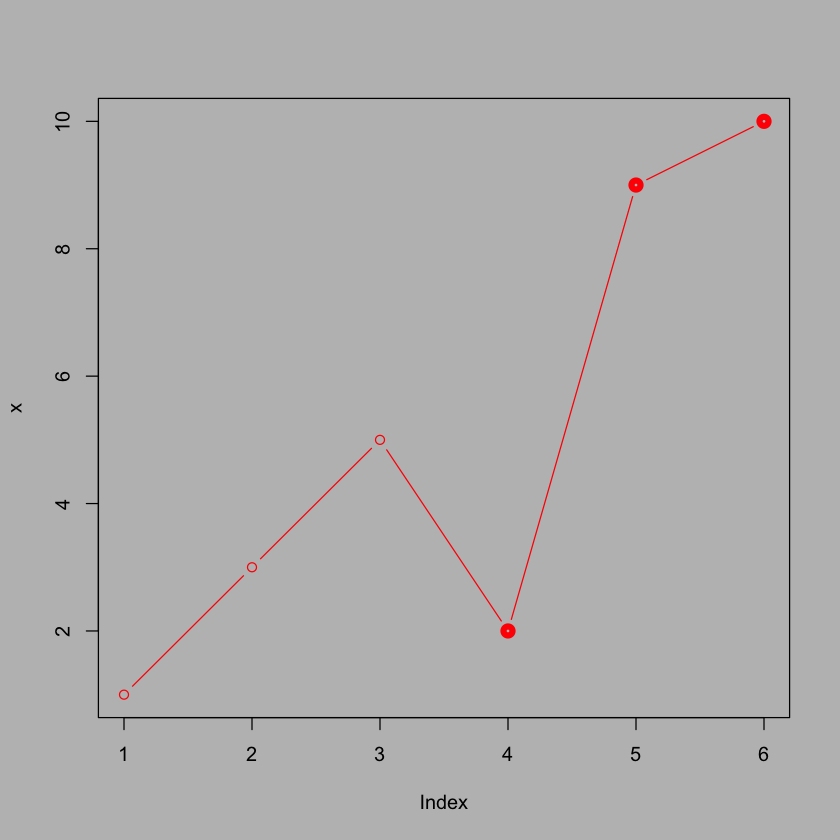

In [2]:
par(bg ="grey")

x<- c(1,3,5,2,9,10)
plot(x,
        type ="b",
        col = 'red',
        lwd =c(rep(1,3),rep(5,3)),
)

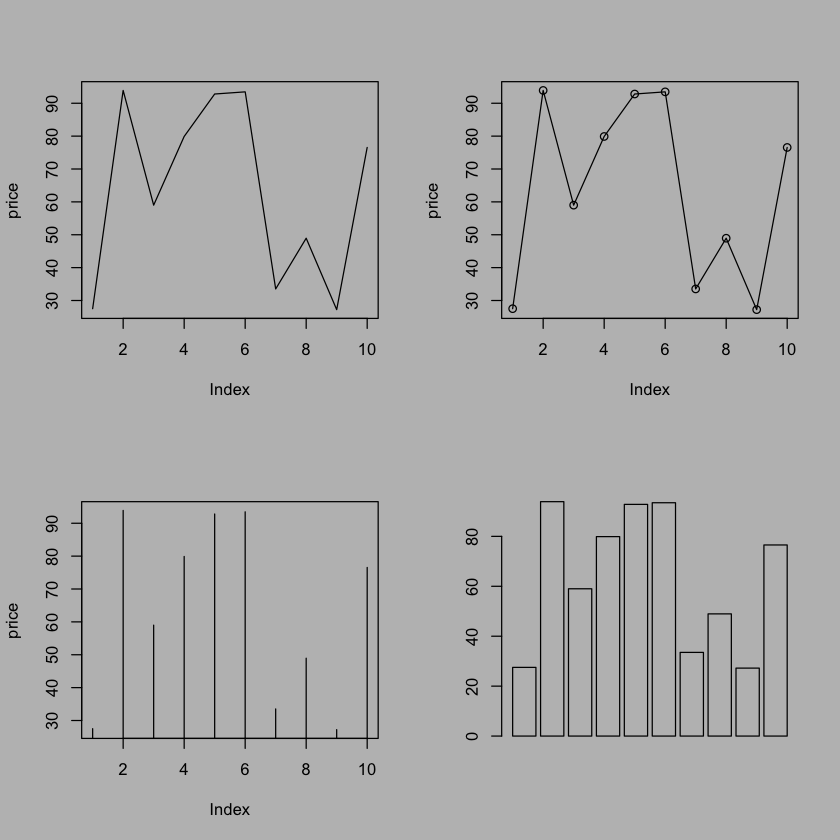

In [3]:
# 한 화면에 차트 여러개 그려서 비교하기
price <- runif(10,min=1, max=100)
par(bg = 'grey')
#plot(price)
# type 속성으로 여러화면 그리기 
# 2행 2열 차트 그리기 
par( mfrow = c(2,2)) #  plot 의 행열
plot(price,type ='l')
plot(price,type ='o')
plot(price,type ='h')
#plot(price,type ='s')
barplot(price)

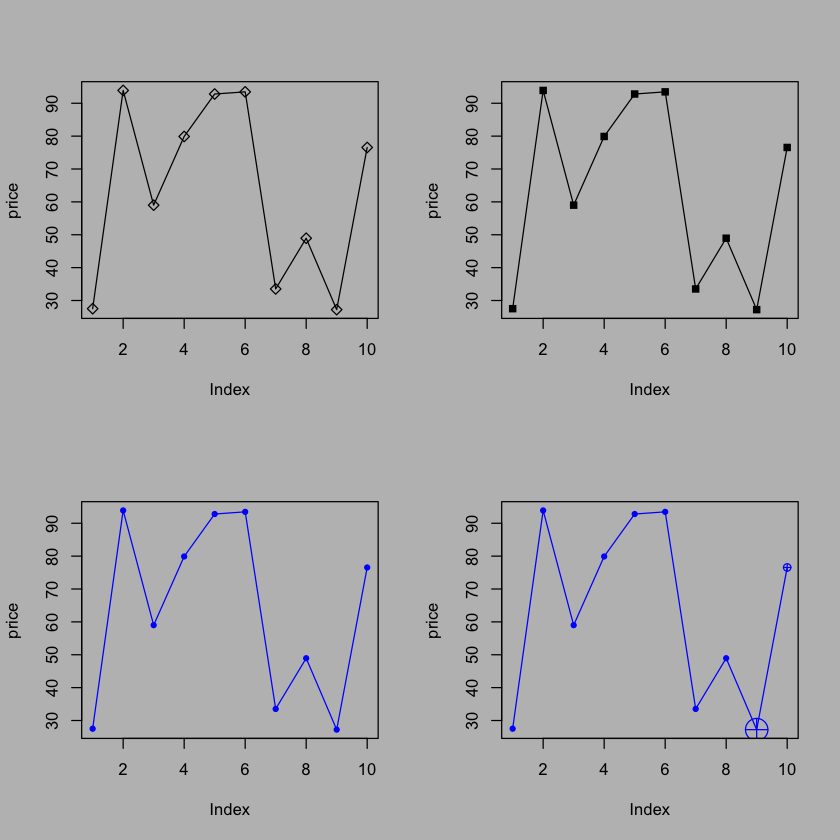

In [4]:
par(bg ='grey', mfrow = c(2,2))
plot(price, type='o', pch=5)
plot(price, type='o', pch=15)
plot(price, type='o', pch=20, col = 'blue')
plot(price, type='o', pch= c(rep(20,8),10,10),
                    col ='blue',
                    cex = c(rep(1,8),3,1)

)

# 중첩 자료 시각화

In [5]:
x <- c(1,2,3,4,2,4)
y <- rep(2,6)

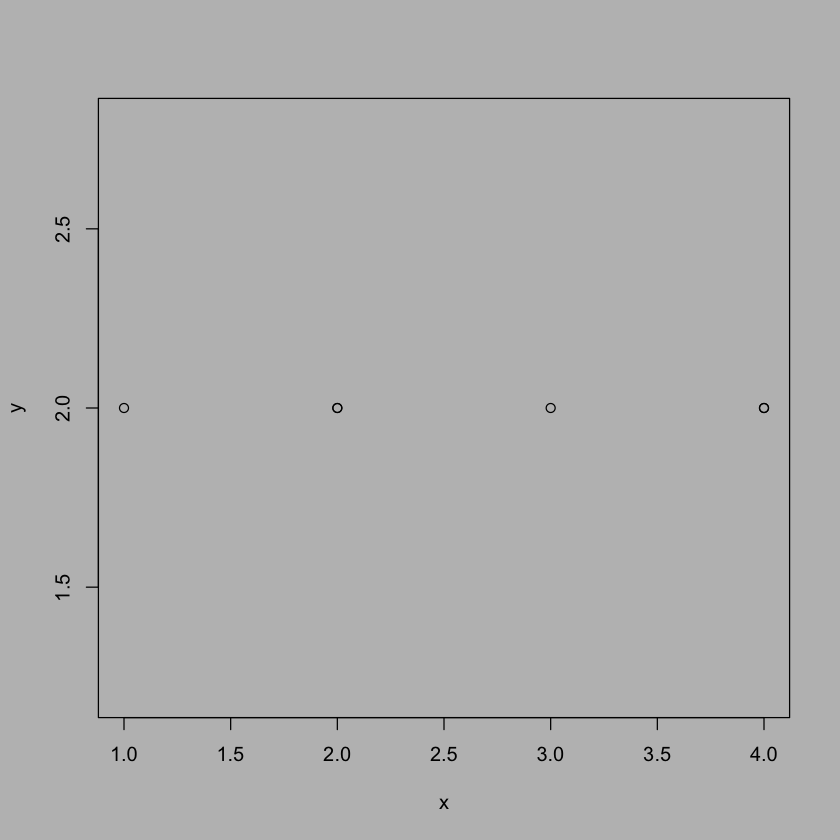

In [6]:
par(bg ='grey')
plot(x,y)

In [7]:
table(x,y)


   y
x   2
  1 1
  2 2
  3 1
  4 2

x,y,Freq
<fct>,<fct>,<int>
1,2,1
2,2,2
3,2,1
4,2,2


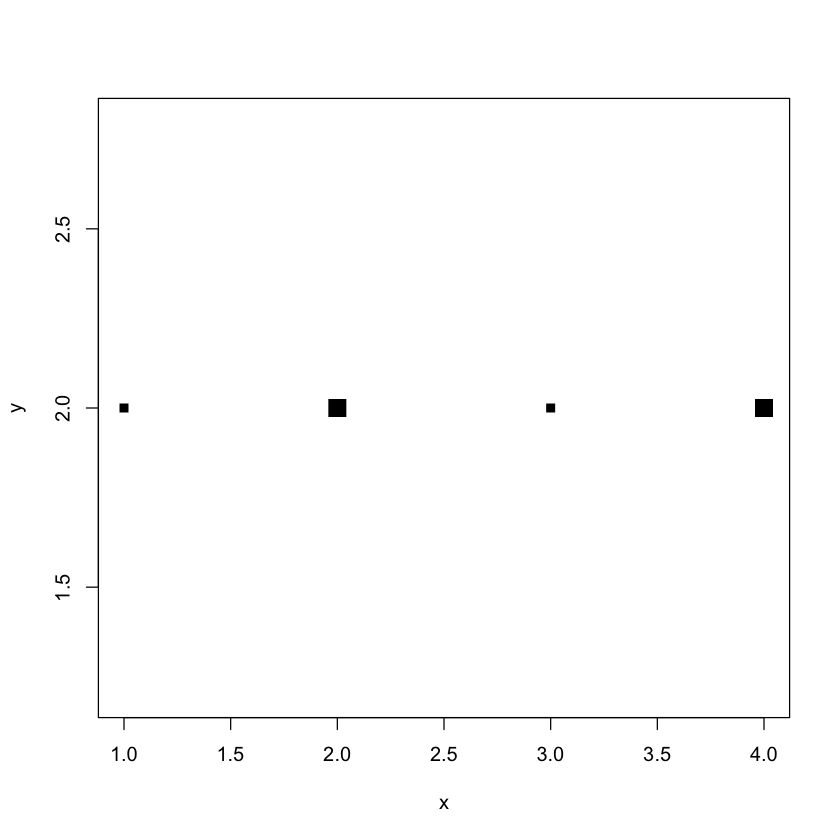

In [8]:
par(bg='white')
xy.df <- as.data.frame(table(x,y))
xy.df
plot(x,y,
    pch =15,
    cex = xy.df$Freq
)



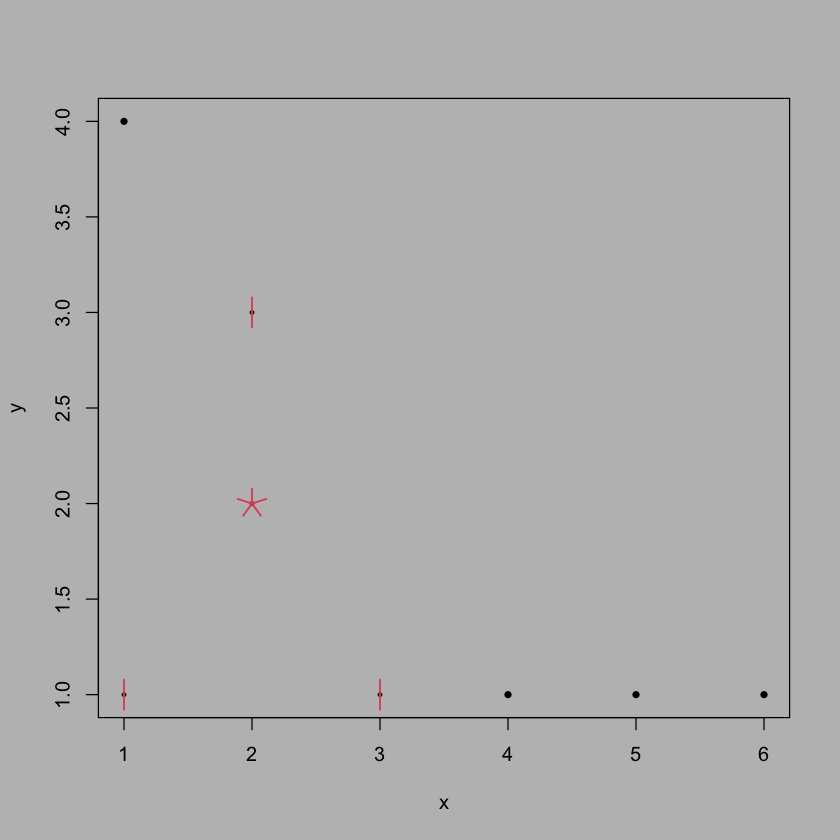

In [9]:
par(bg ='grey')
x<- c(1,1,1,2,2,2,2,2,2,2,3,3,4,5,6)
y <-c(1,1,4,2,3,2,2,2,3,2,1,1,1,1,1)
# plot(x,y)
z <- data.frame(x,y)
sunflowerplot(z)

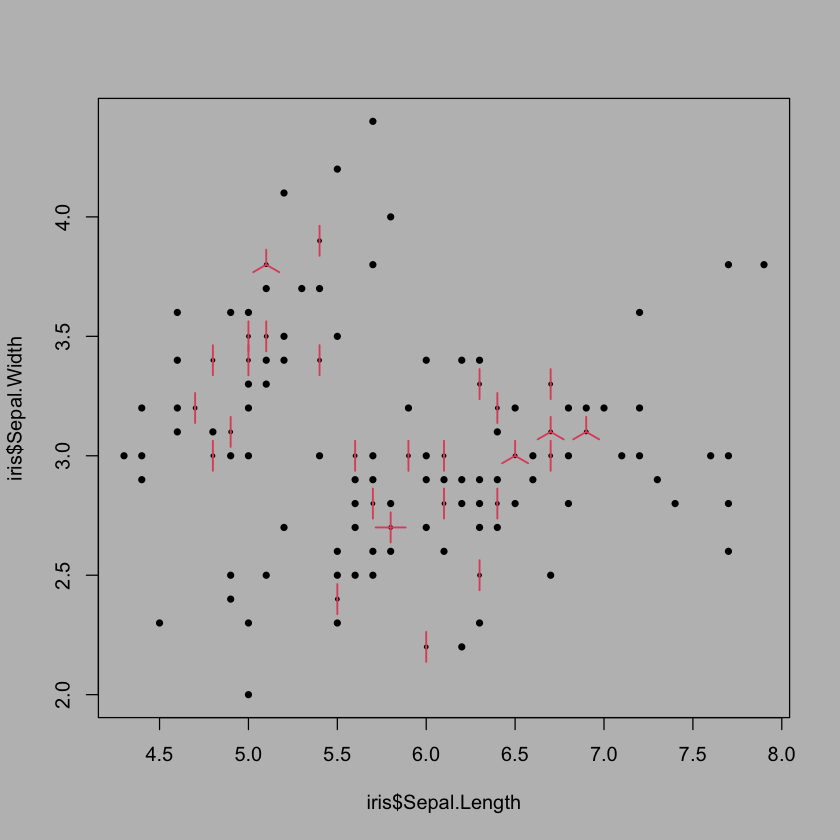

In [10]:
# iris의 Sepal.Length와 iris의 Sepal.Width의 중복 확인 산포도 
par(bg ="grey")
sunflowerplot(iris$Sepal.Length,iris$Sepal.Width)

# chart 2개 겹처서 출력하기


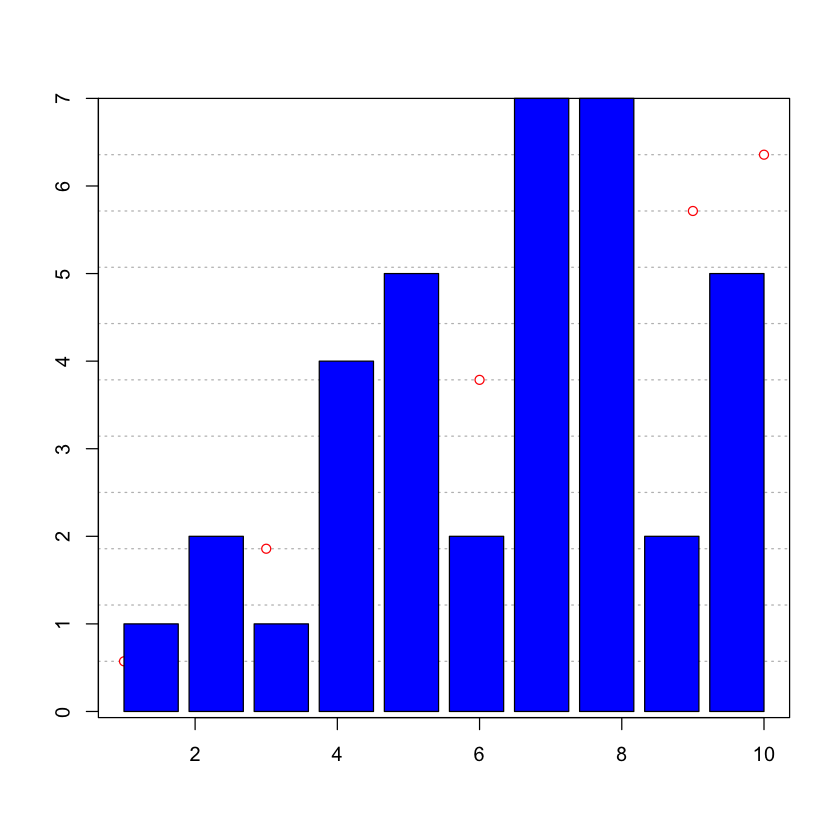

In [11]:
par(bg ='white')
x<- 1:10
dotchart(x,col ='red')
y<-c(1,2,1,4,5,2,7,7,2,5)

# 현재 차트를 유지하고 다른 차트를 생성한다. 
par(new =T)
barplot(
    y, 
    col ='blue',

)

### 투명도

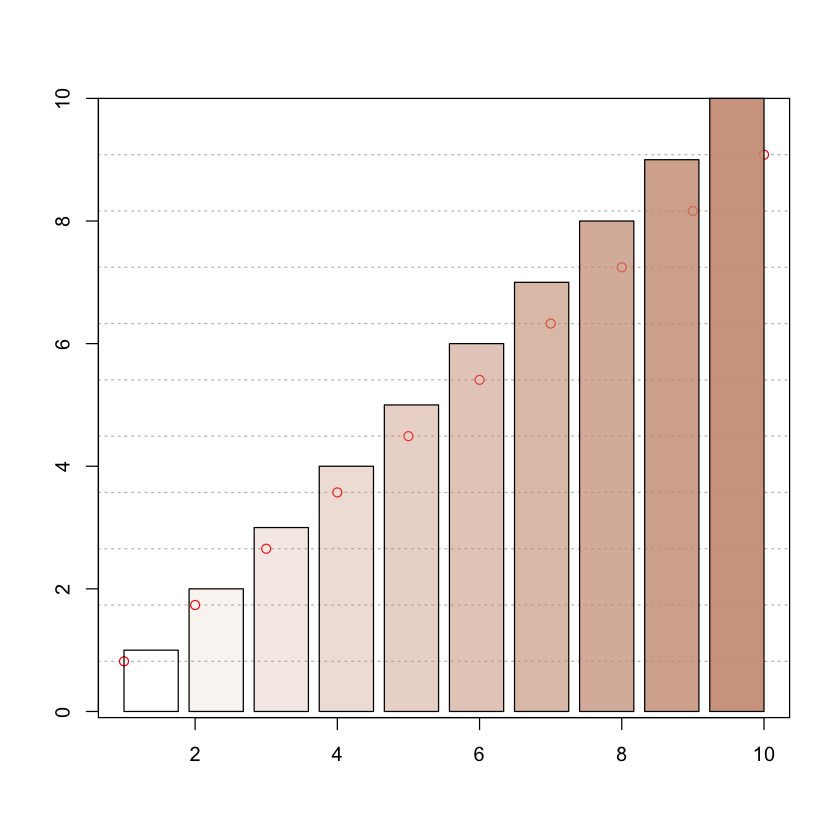

In [12]:
par(bg = 'white')
x <-1:10
dotchart(x,color = 'red')
par(new =T)
mycol <- rgb(0.8,0.6,0.5,seq(0,1,0.1))
barplot(x, col =mycol )

## 상자 수염 그래프

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    110     150     280     230     300     310 

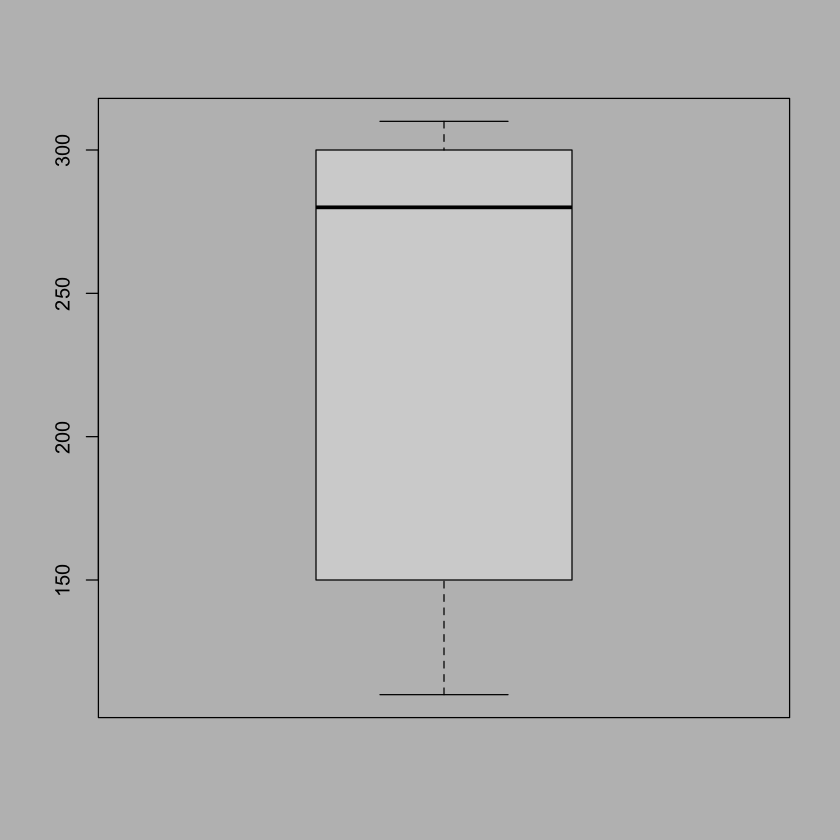

In [13]:
par(bg = 'grey')
abc <- c(110,300,150,280,310)
boxplot(abc)
summary(abc)

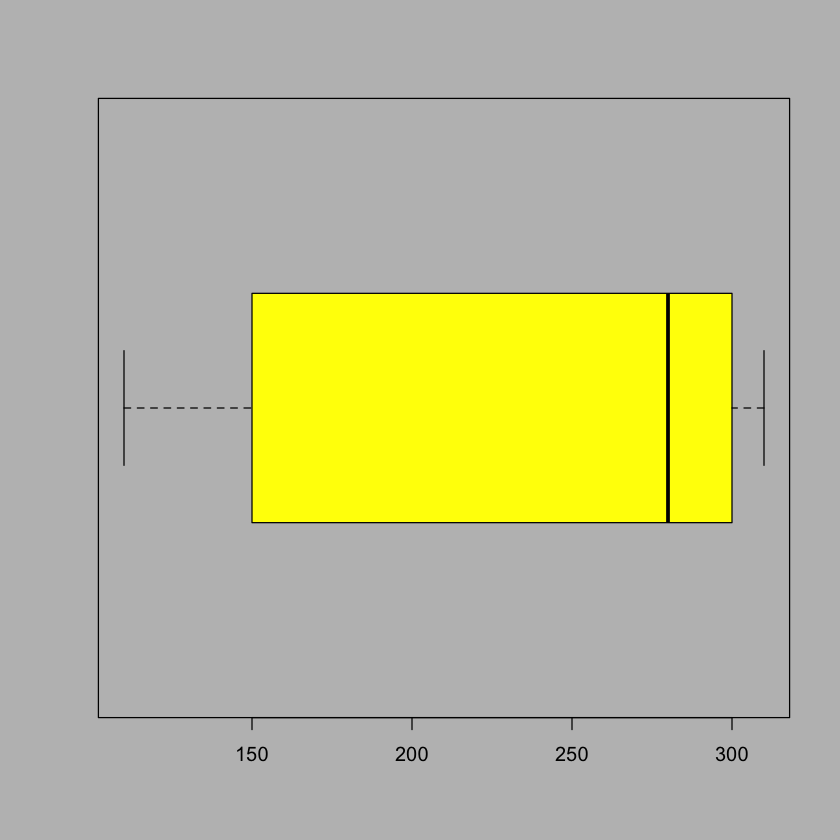

In [14]:
par(bg ='grey')
boxplot(abc,
        col ='yellow',
        horizontal =T
        # 굵은 선은 중앙값이다. 
)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.714   1.500   5.000 

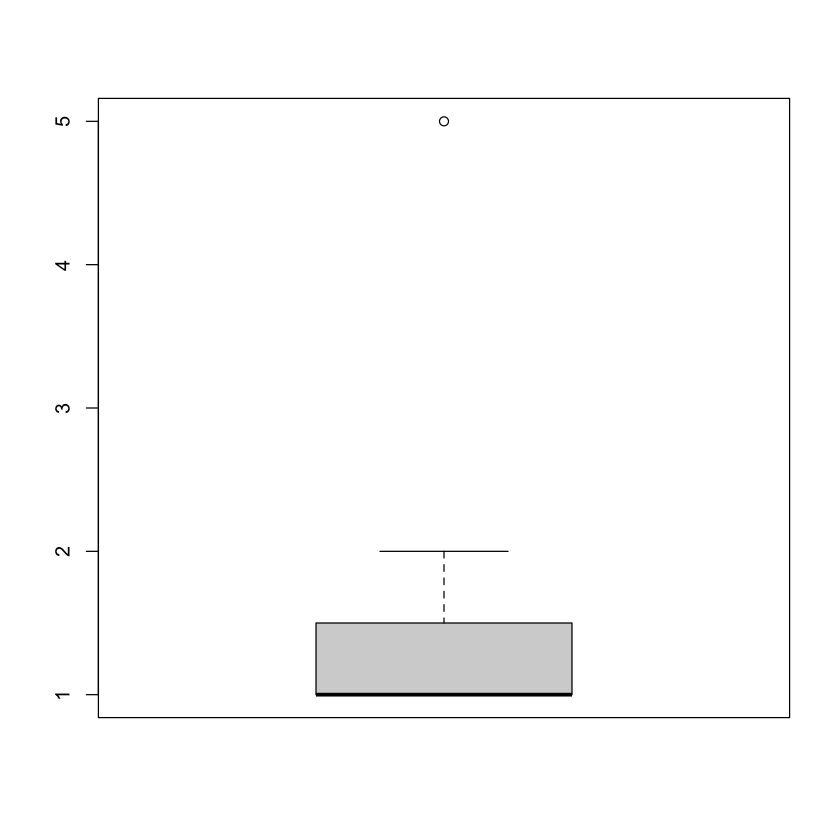

In [15]:
jkl <- c(1,1,1,1,1,2,5)
par(bg = 'white')
summary(jkl)
# box plot 을 데이터 체크후 멘 나중에 추가해서 봐라. 
boxplot(jkl)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


'data.frame':	50 obs. of  2 variables:
 $ speed: num  4 4 7 7 8 9 10 10 10 11 ...
 $ dist : num  2 10 4 22 16 10 18 26 34 17 ...


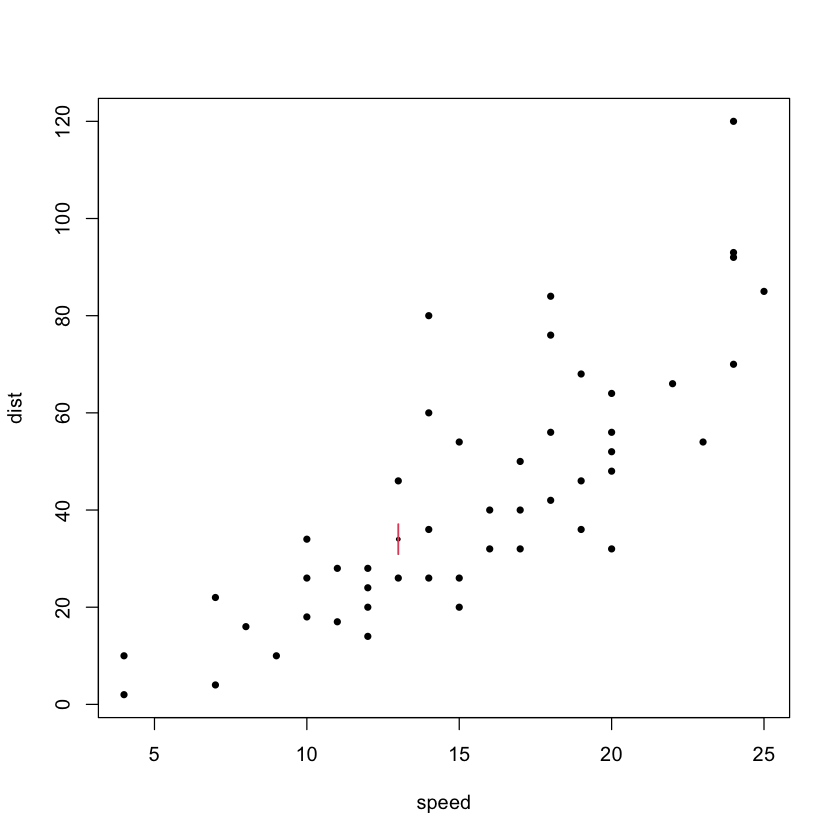

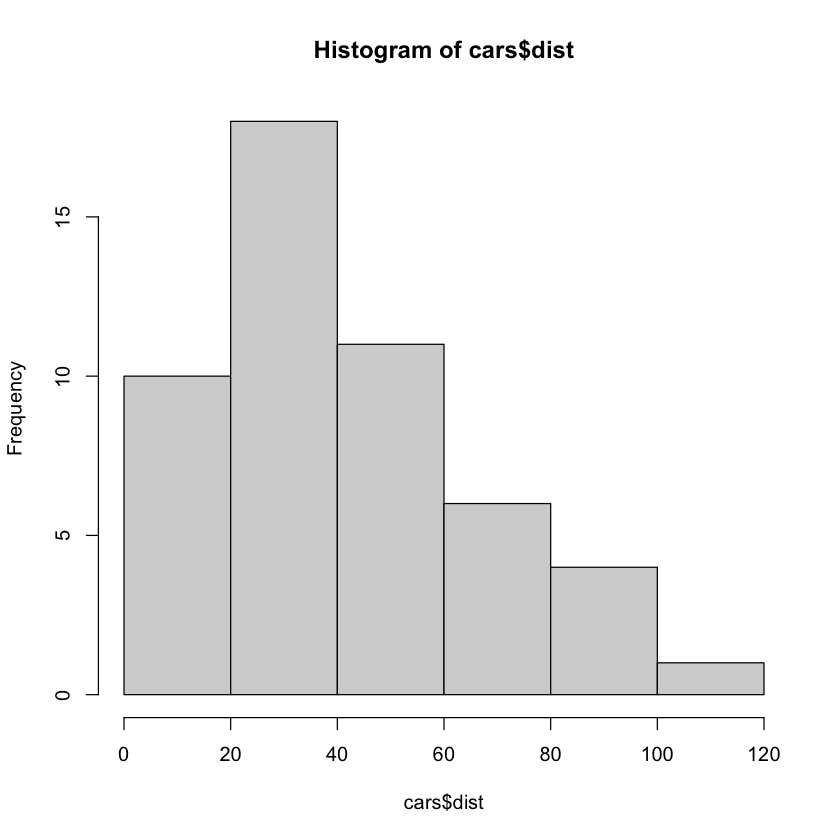

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

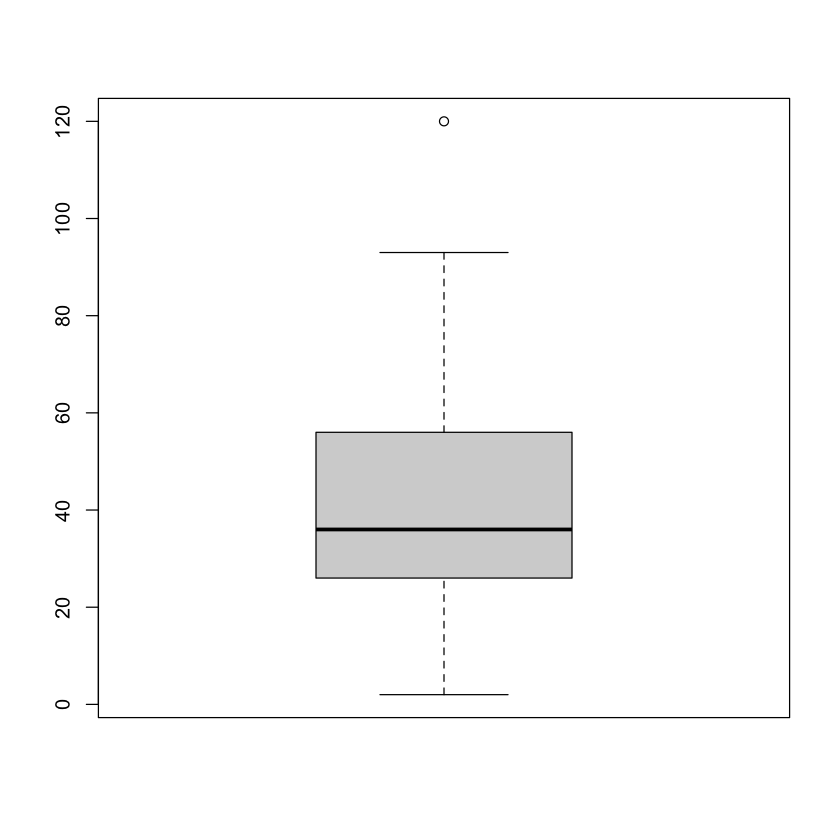

In [16]:
# 자동차의 제동거리
data(cars)
head(cars)
str(cars)
par (bg = 'white')
sunflowerplot(cars)
hist(cars$dist)
boxplot(cars$dist)
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8") # 한글 설정

[1] 30

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   26.00   36.00   42.98   56.00  120.00 

[1]  2 10  4 22 16 10 18 26 34 17 28 14 20 24 28 26 34 34 46 26 36 60 80 20 26
[26] 54 32 40 32 40 50 42 56 76 84 36 46 68 32 48 52 56 64 66 54 70 92 93 85

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   26.00   36.00   41.41   56.00   93.00 


>> 1사분위 -3사분위 :  30
>> 특이치 - max value : 27
>> 특이치 입니다.

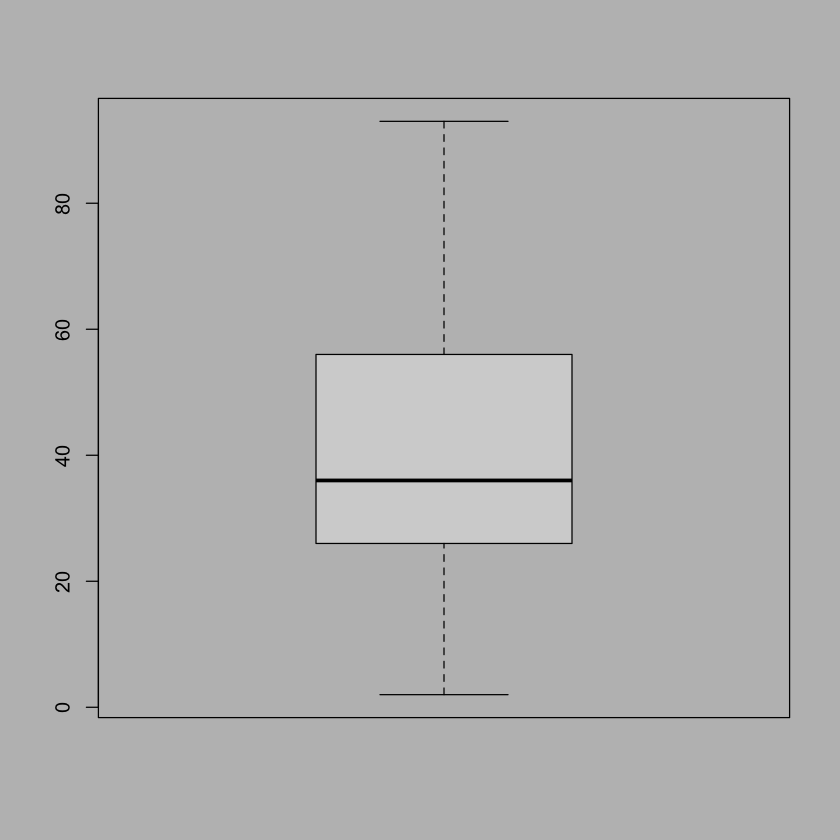

In [17]:
#as.integer(quantile(cars$dist,0.75))
diff_13<-as.integer(quantile(cars$dist,0.75))-as.integer(quantile(cars$dist,0.25)) # 1사분위 - 3사분위
diff_13
max_val<-max(cars$dist)
summary(cars$dist)
cars_WoMax<-cars$dist[-(which(cars$dist==max(cars$dist)))]
cars_WoMax
summary(cars_WoMax)
par(bg ='grey')
boxplot(cars_WoMax)
#help(quantile)

cat("\n>> 1사분위 -3사분위 : ",diff_13)
cat("\n>> 특이치 - max value :", max(cars$dist) - max(cars_WoMax))
 # 13 사분위 차이 보다 max와  특이점의 차이가 큰가? 크면(T)  이상치, 작으면(F) 특이치
if(max(cars$dist) - max(cars_WoMax) > diff_13){
    cat("\n>> 이상치 입니다")
} else{
    cat("\n>> 특이치 입니다.")
}

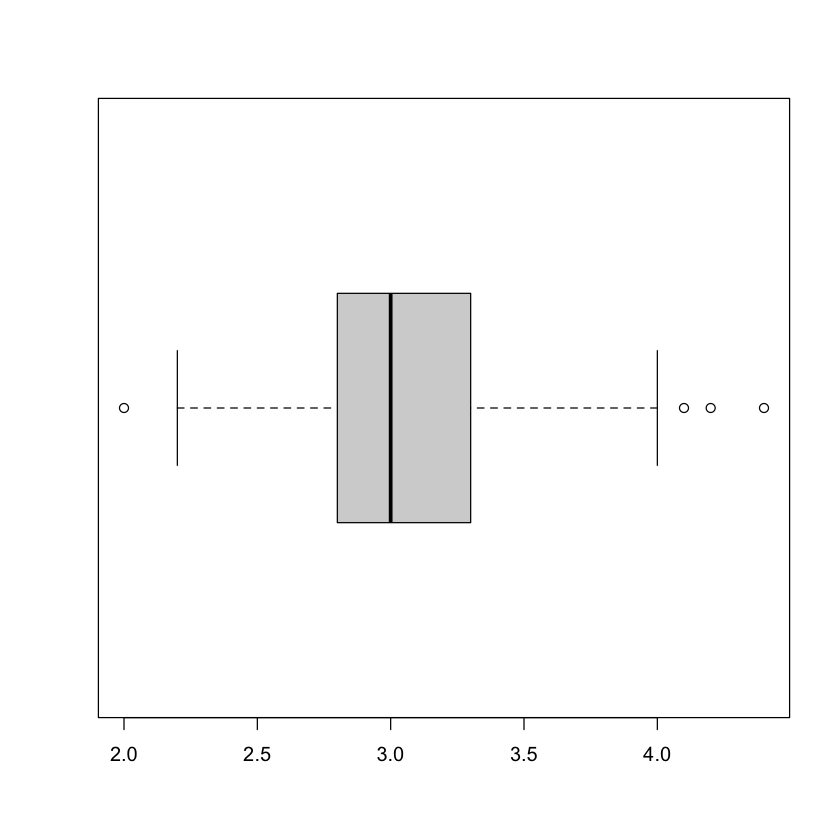

In [18]:
par(bg = 'white')
boxplot(iris$Sepal.Width, horizontal=T)

# 기타 그래프


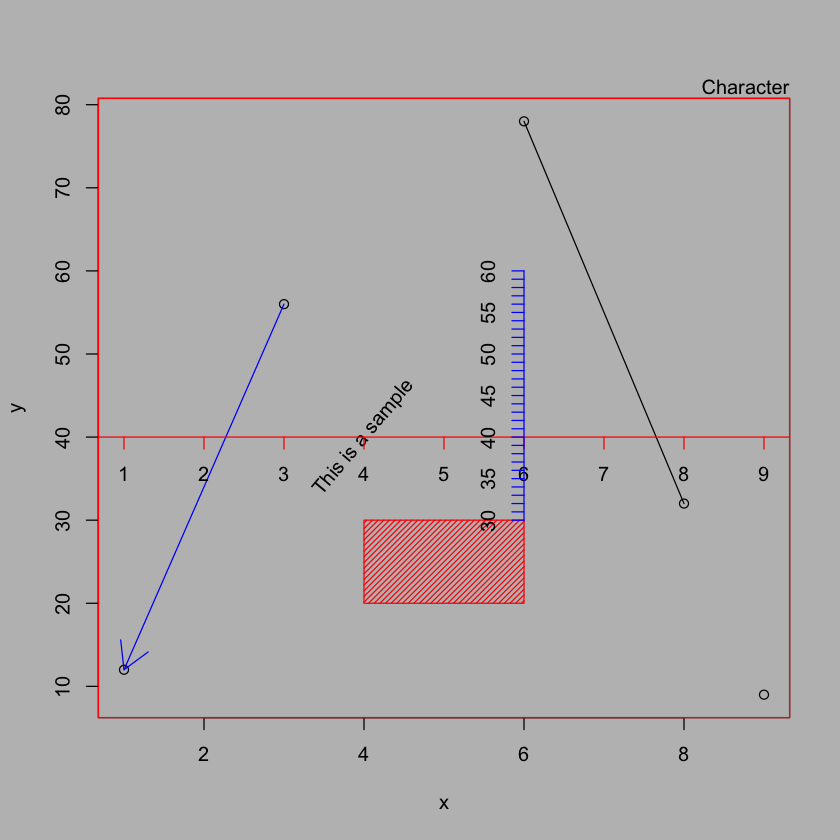

In [19]:
par ( bg = 'grey')
x<-  c(1 ,3 ,6 ,8 ,9)
y <- c(12,56,78,32,9)
plot(x,y)
# (3,3)과 4,4 연결하는 선분그리기
segments(6,78, 8,32)
# 화살표 그리기
arrows(3,56,1,12, col ='blue')
# 사각형 그리기

rect(4,20,6,30, density = 30, col ='red')

# 글자 쓰기 
text(4,40, "This is a sample", srt =50) # 회전 50

# 테두리 활용하기
mtext("Character", side= 3, adj =1 )

# 그림테두리 그리기
box(lty = 1, col='red')
#x 축 추가, y축의 40위치에 0~10 까지 표시하고 색은 빨간색
axis(1,pos = 40, at =0:10, col ='red')

# y축의 추가, x축의 6위치에 
axis(2, pos=6, at =30:60, col ='blue')

In [22]:
election<-read.csv("../Data/election_2022.csv")
library(dplyr) # dplyr 불러오기
#head(election)


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
경기도 화성시,경기도,화성시,703896,542027,283324,236055,12955
경기도 부천시,경기도,부천시,699678,532995,285227,224331,13249
경기도 남양주시,경기도,남양주시,608146,460518,239179,203075,10089
서울특별시 송파구,서울특별시,송파구,565840,453536,180490,255166,10652
서울특별시 강서구,서울특별시,강서구,504185,390247,190000,181510,11100


경기도 화성시     경기도 부천시   경기도 남양주시 서울특별시 송파구 
           532334            522807            452343            446308 
서울특별시 강서구 
           382610

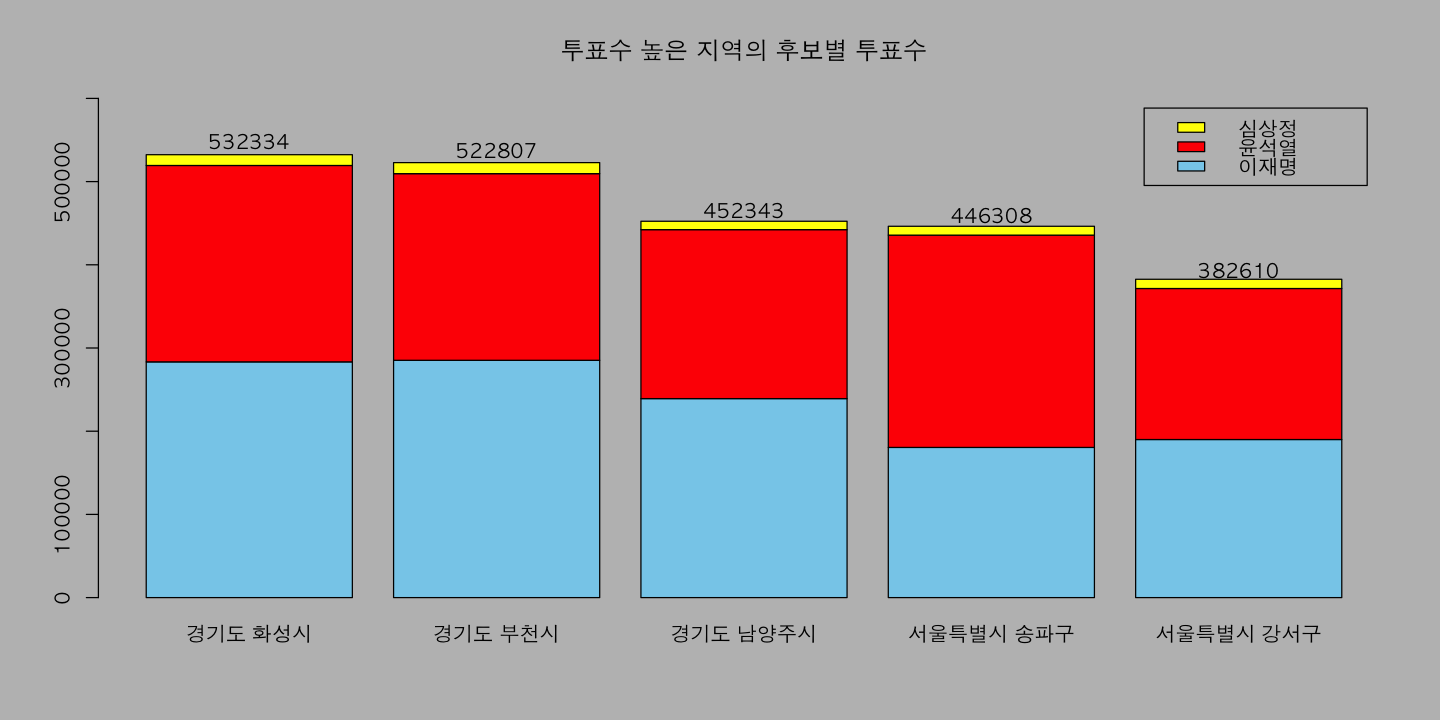

In [106]:
## graph 설정
options(warn = -1) ## 경고 지우기
options(scipen =100)
options(repr.plot.width=12, repr.plot.height=6)  

elect_top5Area<-arrange(election,desc(투표수))[1:5,];
#top5 선거구 이름
elect_top5Area_name<-paste(elect_top5Area[,1],elect_top5Area[,2])

rownames(elect_top5Area)<-elect_top5Area_name
par( bg="grey")
par(family="AppleGothic")
barplot(t(elect_top5Area[,5:7]),
    col= c("sky blue", "red", "yellow"),
    legend.text = T,
    main = "투표수 높은 지역의 후보별 투표수",
    ylim = c(0,600000),
)
elect_top5Area

apply(elect_top5Area[5:7],1,sum)
#elect_num<-elect_top5Area[,4]
elect_num<- apply(elect_top5Area[5:7],1,sum)
xpos= 0.7
for(i in c(1,2,3,4,5)){ 
        text(xpos,elect_num[i]*1.03, elect_num[i]) 
        xpos=xpos+1.2
    }



,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
경기도 화성시,경기도,화성시,703896,542027,283324,236055,12955
경기도 부천시,경기도,부천시,699678,532995,285227,224331,13249
경기도 남양주시,경기도,남양주시,608146,460518,239179,203075,10089
서울특별시 송파구,서울특별시,송파구,565840,453536,180490,255166,10652
서울특별시 강서구,서울특별시,강서구,504185,390247,190000,181510,11100


,이재명,윤석열,심상정
,<dbl>,<dbl>,<dbl>
경기도 화성시,53.22,44.34,2.43
경기도 부천시,54.56,42.91,2.53
경기도 남양주시,52.88,44.89,2.23
서울특별시 송파구,40.44,57.17,2.39
서울특별시 강서구,49.66,47.44,2.90


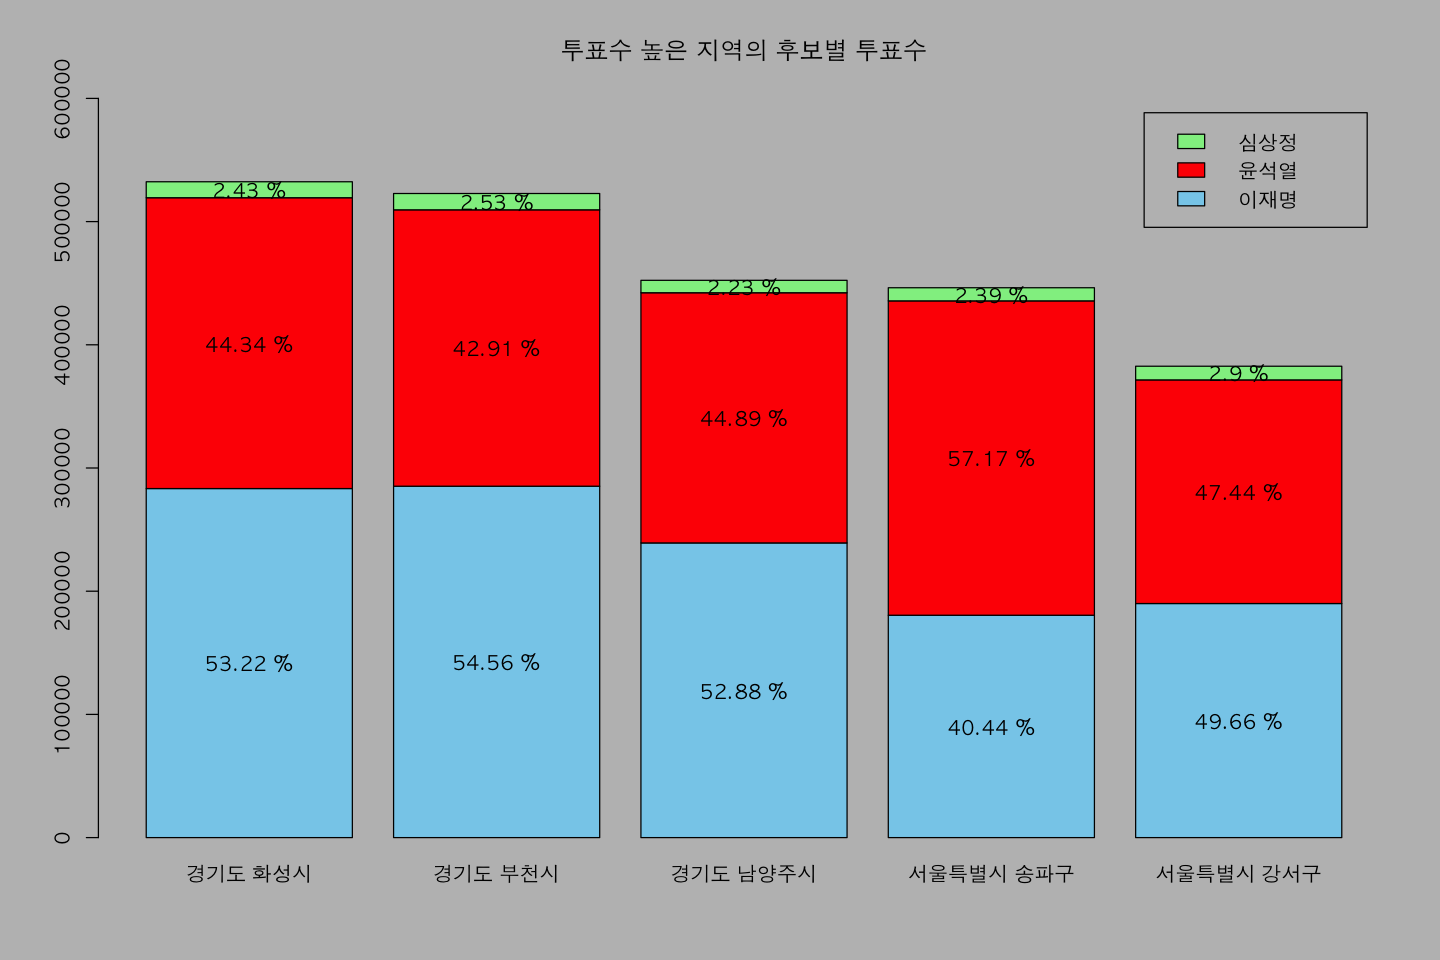

In [160]:
elect_top5Area<-arrange(election,desc(투표수))[1:5,];

#top5 선거구 이름
elect_top5Area_name<-paste(elect_top5Area[,1],elect_top5Area[,2])

rownames(elect_top5Area)<-elect_top5Area_name
par( bg="grey")
par(family="AppleGothic")
barplot(t(elect_top5Area[,5:7]),
    col= c("sky blue", "red", "lightgreen"),
    legend.text = T,
    main = "투표수 높은 지역의 후보별 투표수",
    ylim = c(0,600000),
)
elect_top5Area



# 투표율 표시
elect_top5Rate <- round(elect_top5Area[5:7]/elect_num*100,2); elect_top5Rate
xpos_rate= 0.7

options(repr.plot.width=12, repr.plot.height=8)
## 투표율 TEXT 
##[X 위치 이동]##
for(i in seq(1,nrow(elect_top5Rate),1) ){ #  1~5 (시군구)
        ypos_rate <-0 #투표율 Y 축 위치
        for(j in seq(1,ncol(elect_top5Rate),1) ) { # 1~3 (후보): bar 하나 안에서 3개 찍는 y 위치 
            ##[Y 위치 이동]##
            if(j != 1){ # 두번째부터  y 위치 이동
                ypos_rate<- ypos_rate +
                        as.integer(elect_top5Area[5:7][i,j-1]/2)+
                        as.integer(elect_top5Area[5:7][i,j]/2)
            text(xpos_rate,ypos_rate, paste(elect_top5Rate[i,j],"%")) 
            }
            
            else{ # y 처음 위치
                ypos_rate<-  as.integer(elect_top5Area[5:7][i,j]/2)
                text(xpos_rate,ypos_rate, paste(elect_top5Rate[i,j],"%")) 
            }
        }
    xpos_rate=xpos_rate+1.2 # x 위치 이동
    }
